# *Project_1: App Rating Prediction by Archana Kumari*

# DESCRIPTION:

## Objective: Make a model to predict the app rating, with other information about the app provided.

### Problem Statement:

Google Play Store team is about to launch a new feature wherein, certain apps that are promising, are boosted in visibility. The boost will manifest in multiple ways including higher priority in recommendations sections (“Similar apps”, “You might also like”, “New and updated games”). These will also get a boost in search results visibility.  This feature will help bring more attention to newer apps that have the potential.

### Domain: General

Analysis to be done: The problem is to identify the apps that are going to be good for Google to promote. App ratings, which are provided by the customers, is always a great indicator of the goodness of the app. The problem reduces to: predict which apps will have high ratings.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Steps to perform:

## 1. Load the data file using pandas. 

In [2]:
data = pd.read_csv("googleplaystore.csv")

In [3]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


## 2. Check for null values in the data. Get the number of null values for each column.

In [5]:
data.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

## 3. Drop records with nulls in any of the columns. 

Dropping the records with null ratings
- this is done because ratings is our target variable

Why we drop null value

- A null value represents an unknown or missing value in a dataset. It indicates that the data is absent or not applicable for a particular observation or record.


In [6]:
data.dropna(how ='any', inplace = True)

In [7]:
data.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [8]:
data.isnull().any()

App               False
Category          False
Rating            False
Reviews           False
Size              False
Installs          False
Type              False
Price             False
Content Rating    False
Genres            False
Last Updated      False
Current Ver       False
Android Ver       False
dtype: bool

Confirming that the null records have been dropped

#### Change variable to correct types

In [9]:
data.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

## 4.	Variables seem to have incorrect type and inconsistent formatting. You need to fix them: 

1.	Size column has sizes in Kb as well as Mb. To analyze, you’ll need to convert these to numeric.
a.	Extract the numeric value from the column
b.	Multiply the value by 1,000, if size is mentioned in Mb

2.	Reviews is a numeric field that is loaded as a string field. Convert it to numeric (int/float).

3.	Installs field is currently stored as string and has values like 1,000,000+. 
a.	Treat 1,000,000+ as 1,000,000
b.	remove ‘+’, ‘,’ from the field, convert it to integer

4.	Price field is a string and has $ symbol. Remove ‘$’ sign, and convert it to numeric.


### 4.1 Handling the app size field

Size column has sizes in Kb as well as Mb. To analyze, you’ll need to convert these to numeric.

    a. Extract the numeric value from the column 
    b. Multiply the value by 1,000, if size is mentioned in Mb

In [10]:
data.Size.describe()

count                   9360
unique                   413
top       Varies with device
freq                    1637
Name: Size, dtype: object

In [11]:
def change_size(size):
    if 'M' in size:
        x = size[:-1]
        x = float(x)*1000
        return(x)
    elif 'k' == size[-1:]:
        x = size[:-1]
        x = float(x)
        return(x)
    else:
        return None


In [12]:

data["Size"] = data["Size"].map(change_size)

In [13]:
data.Size.describe()

count      7723.000000
mean      22970.456105
std       23449.628935
min           8.500000
25%        5300.000000
50%       14000.000000
75%       33000.000000
max      100000.000000
Name: Size, dtype: float64

In [14]:
data["Size"].isnull().sum()

1637

In [15]:
#filling Size which had NA

data.Size.fillna(method = 'ffill', inplace = True)

In [16]:
data.Size.describe()

count      9360.000000
mean      23143.466079
std       23245.147490
min           8.500000
25%        5500.000000
50%       15000.000000
75%       33000.000000
max      100000.000000
Name: Size, dtype: float64

In [17]:
data.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size              float64
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [18]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


#### 4.2 Converting reviews to numeric

Reviews is a numeric field that is loaded as a string field. Convert it to numeric (int/float).

In [19]:
data.Reviews.describe() # object == categorical variable

count     9360
unique    5990
top          2
freq        83
Name: Reviews, dtype: object

In [20]:
data["Reviews"] = data["Reviews"].astype("int32")

In [21]:
data.Reviews.describe()

count    9.360000e+03
mean     5.143767e+05
std      3.145023e+06
min      1.000000e+00
25%      1.867500e+02
50%      5.955000e+03
75%      8.162750e+04
max      7.815831e+07
Name: Reviews, dtype: float64

### 4.3 Now, handling the installs column
Installs field is currently stored as string and has values like 1,000,000+.

a. Treat 1,000,000+ as 1,000,000 b. remove ‘+’, ‘,’ from the field, convert it to integer

In [22]:
data.Installs.describe() # object == categorical variable

count           9360
unique            19
top       1,000,000+
freq            1576
Name: Installs, dtype: object

In [23]:
data.Installs.value_counts()

1,000,000+        1576
10,000,000+       1252
100,000+          1150
10,000+           1009
5,000,000+         752
1,000+             712
500,000+           537
50,000+            466
5,000+             431
100,000,000+       409
100+               309
50,000,000+        289
500+               201
500,000,000+        72
10+                 69
1,000,000,000+      58
50+                 56
5+                   9
1+                   3
Name: Installs, dtype: int64

In [24]:
def clean_Installs(Installs):
    return int(Installs.replace(",", "").replace("+", ""))

In [25]:
data['Installs'] = data['Installs'].apply(clean_Installs)

In [26]:
data.Installs.describe()

count    9.360000e+03
mean     1.790875e+07
std      9.126637e+07
min      1.000000e+00
25%      1.000000e+04
50%      5.000000e+05
75%      5.000000e+06
max      1.000000e+09
Name: Installs, dtype: float64

In [27]:
data.Installs.value_counts()

1000000       1576
10000000      1252
100000        1150
10000         1009
5000000        752
1000           712
500000         537
50000          466
5000           431
100000000      409
100            309
50000000       289
500            201
500000000       72
10              69
1000000000      58
50              56
5                9
1                3
Name: Installs, dtype: int64

#### 4.4 Price column needs to be cleaned

    Price field is a string and has $ symbol. Remove ‘$’ sign, and convert it to numeric.

In [28]:
data.Price.describe()

count     9360
unique      73
top          0
freq      8715
Name: Price, dtype: object

In [29]:
data.Price.value_counts()[:5]

0        8715
$2.99     114
$0.99     106
$4.99      70
$1.99      59
Name: Price, dtype: int64

In [30]:
def clean_price(x):
    if '$' in x:
        x = x[1:]
        x = float(x)
        return(x)
    elif x == 0:
        x = float(x)
        return x
    else:
        return float(x)

In [31]:
data['Price'] = data.Price.map(clean_price)

In [32]:
data.Price.value_counts().head(5)

0.00    8715
2.99     114
0.99     106
4.99      70
1.99      59
Name: Price, dtype: int64

## 5. Some sanity checks
    1. Average rating should be between 1 and 5 as only these values are allowed on the play store. Drop the rows that have a value outside this range.
    2. Reviews should not be more than installs as only those who installed can review the app. If there are any such records, drop them.
    3. For free apps (type = “Free”), the price should not be >0. Drop any such rows.

#### 5.1 	Avg. rating should be between 1 and 5, as only these values are allowed on the play store. Drop any rows that have a value outside this range.

In [33]:
data.loc[(data.Rating >= 1) & (data.Rating <= 5)]
print(data.Rating.describe())

count    9360.000000
mean        4.191838
std         0.515263
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64


Min is 1 and max is 5. Looks good.

#### 5.2.	Reviews should not be more than installs as only those who installed can review the app.

Checking if reviews are more than installs. Counting total rows like this.

In [34]:
print((data.Reviews > data.Installs).sum())

7


In [35]:
data.loc[data.Reviews > data.Installs]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2454,KBA-EZ Health Guide,MEDICAL,5.0,4,25000.0,1,Free,0.00,Everyone,Medical,"August 2, 2018",1.0.72,4.0.3 and up
4663,Alarmy (Sleep If U Can) - Pro,LIFESTYLE,4.8,10249,30000.0,10000,Paid,2.49,Everyone,Lifestyle,"July 30, 2018",Varies with device,Varies with device
5917,Ra Ga Ba,GAME,5.0,2,20000.0,1,Paid,1.49,Everyone,Arcade,"February 8, 2017",1.0.4,2.3 and up
6700,Brick Breaker BR,GAME,5.0,7,19000.0,5,Free,0.00,Everyone,Arcade,"July 23, 2018",1.0,4.1 and up
7402,Trovami se ci riesci,GAME,5.0,11,6100.0,10,Free,0.00,Everyone,Arcade,"March 11, 2017",0.1,2.3 and up
8591,DN Blog,SOCIAL,5.0,20,4200.0,10,Free,0.00,Teen,Social,"July 23, 2018",1.0,4.0 and up
10697,Mu.F.O.,GAME,5.0,2,16000.0,1,Paid,0.99,Everyone,Arcade,"March 3, 2017",1.0,2.3 and up


In [36]:
# retain that part of data where revives are less than installs

data.loc[data.Reviews <= data.Installs]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7,2600.0,500,Free,0.0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000.0,5000,Free,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3600.0,100,Free,0.0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,3600.0,1000,Free,0.0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [37]:
data.shape

(9360, 13)

### 5.3 For free apps (type = “Free”), the price should not be > 0. Drop any such rows.

In [38]:
len(data[(data.Type == "Free") & (data.Price > 0)])

0

## 5.A. Performing univariate analysis:

5.A. Performing univariate analysis: 

-Boxplot for Price
 Are there any outliers? Think about the price of usual apps on Play Store.
 
-Boxplot for Reviews
 Are there any apps with very high number of reviews? Do the values seem right?
 
-Histogram for Rating
 How are the ratings distributed? Is it more toward higher ratings?
-Histogram for Size

# Note down your observations for the plots made. Which of these seem to have outliers?


#### Box plot for price
- Are there any outliers? Think about the price of usual apps on Play Store.

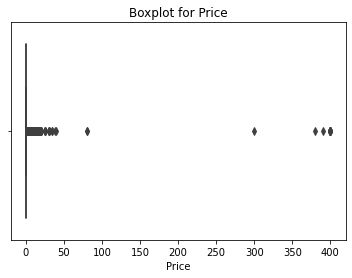

In [39]:
sns.boxplot(x=data.Price).set(title = "Boxplot for Price");

### Yes, there are outliers in the price data for apps on the Play Store. These outliers are likely apps that are significantly more expensive than the usual apps, which typically fall within a much lower price range. This suggests that while most apps are priced affordably, a few are priced much higher, possibly due to offering premium features or being targeted at a niche market. The line inside the box represents the median price of the apps. If you think about the usual apps on the Play Store, most of them are free or have a low price, so these outliers represent the few that are priced unusually high. 

#### Box plot for Reviews
- Are there any apps with very high number of reviews? Do the values seem right?

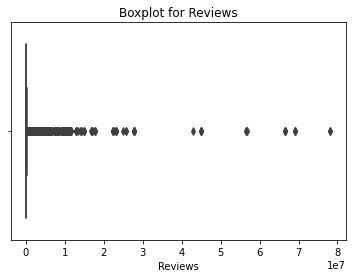

In [40]:
sns.boxplot(x=data.Reviews).set(title = "Boxplot for Reviews");

### Yes, some apps have a very high number of reviews, compared to other apps. These are shown as outliers in the boxplot, far from the main group of apps with fewer reviews. These values seem correct, as it's normal for a few very popular apps to get many more reviews than others.

#### Histogram for Rating
- How are the ratings distributed? Is it more toward higher ratings?


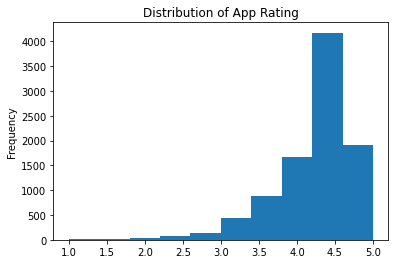

In [41]:
data.Rating.plot.hist(). set(title = "Distribution of App Rating"); 

plt.show()

### Yes, The majority of the app ratings are clustered towards the higher end, particularly between 4.0 and 4.5. The highest frequency of ratings is observed around the 4.5 mark.
### Lower Ratings are below 3.0, indicating that most users are generally satisfied with the apps.
### In summary, the ratings are indeed skewed towards higher values, suggesting that most users rate the apps positively.


#### Histogram of Size

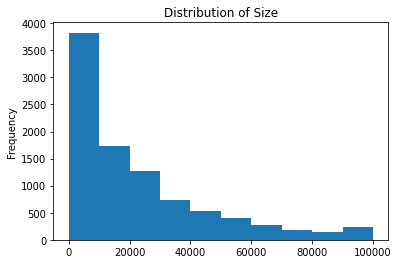

In [42]:
data.Size.plot.hist(). set(title = "Distribution of Size"); 

plt.show()

### The histogram plot shows the distribution of the variable "Size. The distribution is highly right-skewed, meaning most of the values are concentrated on the left side (lower sizes), with fewer and fewer observations as the size increases.

## 6. Outlier treatment: 
1. Price: From the box plot, it seems like there are some apps with very high price. A price of $200 for an application on the Play Store is very high and suspicious!
   
   a. Check out the records with very high price
        i. Is 200 indeed a high price?
   
   b. Drop these as most seem to be junk apps
   
2. Reviews: Very few apps have very high number of reviews. These are all star apps that don’t help with the analysis and, in fact, will skew it. Drop records having more than 2 million reviews.

3. Installs: There seems to be some outliers in this field too. Apps having very high number of installs should be dropped from the analysis.

        a. Find out the different percentiles – 10, 25, 50, 70, 90, 95, 99
        
        b. Decide a threshold as cutoff for outlier and drop records having values more than that


#### 6.1.	Price: From the box plot, it seems like there are some apps with very high price. A price of $200 for an application on the Play Store is very high and suspicious!
    a.	Check out the records with very high price
        i.	Is 200 indeed a high price?
    b.	Drop these as most seem to be junk apps

In [131]:
len(data[data['Price'] > 200])

15

In [132]:
data[data.Price > 200]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4197,most expensive app (H),FAMILY,4.3,6,1500.0,100,Paid,399.99,Everyone,Entertainment,"July 16, 2018",1.0,7.0 and up
4362,💎 I'm rich,LIFESTYLE,3.8,718,26000.0,10000,Paid,399.99,Everyone,Lifestyle,"March 11, 2018",1.0.0,4.4 and up
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7300.0,10000,Paid,400.00,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up
5351,I am rich,LIFESTYLE,3.8,3547,1800.0,100000,Paid,399.99,Everyone,Lifestyle,"January 12, 2018",2.0,4.0.3 and up
5354,I am Rich Plus,FAMILY,4.0,856,8700.0,10000,Paid,399.99,Everyone,Entertainment,"May 19, 2018",3.0,4.4 and up
5355,I am rich VIP,LIFESTYLE,3.8,411,2600.0,10000,Paid,299.99,Everyone,Lifestyle,"July 21, 2018",1.1.1,4.3 and up
5356,I Am Rich Premium,FINANCE,4.1,1867,4700.0,50000,Paid,399.99,Everyone,Finance,"November 12, 2017",1.6,4.0 and up
5357,I am extremely Rich,LIFESTYLE,2.9,41,2900.0,1000,Paid,379.99,Everyone,Lifestyle,"July 1, 2018",1.0,4.0 and up
5358,I am Rich!,FINANCE,3.8,93,22000.0,1000,Paid,399.99,Everyone,Finance,"December 11, 2017",1.0,4.1 and up
5359,I am rich(premium),FINANCE,3.5,472,22000.0,5000,Paid,399.99,Everyone,Finance,"May 1, 2017",3.4,4.4 and up


In [43]:
data = data[data.Price <= 200].copy()

data.shape

(9345, 13)

#### 6.2	Reviews: Very few apps have very high number of reviews. These are all star apps that don’t help with the analysis and, in fact, will skew it. Drop records having more than 2 million reviews.

In [44]:
data = data[data.Reviews <= 2000000].copy()

data.shape

(8892, 13)

#### 6.3	Installs:  There seems to be some outliers in this field too. Apps having very high number of installs should be dropped from the analysis.
        a.	Find out the different percentiles – 10, 25, 50, 70, 90, 95, 99
        b.	Decide a threshold as cutoff for outlier and drop records having values more than that

Dropping very high Installs values

In [45]:
data.Installs.quantile([0.1, 0.25, 0.5, 0.70, 0.9, 0.95, 0.99])

0.10         1000.0
0.25        10000.0
0.50       500000.0
0.70      1000000.0
0.90     10000000.0
0.95     10000000.0
0.99    100000000.0
Name: Installs, dtype: float64

Looks like there are just 1% apps having more than 100M installs. These apps might be genuine, but will definitely skew our analysis.  
We need to drop these.


In [46]:
# how many row have installs greater than corresponding to 99 percentile.

percentile_99 = data.Installs.quantile(0.99)

count = (data.Installs >= percentile_99).sum()
print(count)

142


In [139]:
# retain installs less than corresponding to 99 percentile. & shape

data = data[data.Installs < percentile_99]
print(data.shape)

(8750, 13)


## 7. Bivariate analysis: Let’s look at how the available predictors relate to the variable of interest, i.e., our target variable rating. Make scatter plots (for numeric features) and box plots (for character features) to assess the relations between rating and the other features.

    1.	Make scatter plot/joinplot for Rating vs. Price
        a.	What pattern do you observe? Does rating increase with price?
    2.	Make scatter plot/joinplot for Rating vs. Size
        a.	Are heavier apps rated better?
    3.	Make scatter plot/joinplot for Rating vs. Reviews
        a.	Does more review mean a better rating always?
    4.	Make boxplot for Rating vs. Content Rating
        a.	Is there any difference in the ratings? Are some types liked better?
    5.	Make boxplot for Ratings vs. Category
        a.	Which genre has the best ratings?

### For each of the plots above, note down your observation.


#### 7.1.	Make scatter plot/joinplot for Rating vs Price
    a.	What pattern do you observe? Does rating increase with price?


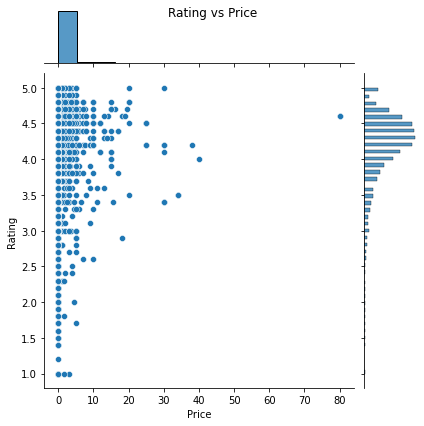

In [47]:
plot = sns.jointplot(x = data.Price, y = data.Rating, kind = 'scatter');
plot.fig.suptitle("Rating vs Price");

### The scatter plot shows the relationship between the Rating and Price variables. The x-axis represents Price, and the y-axis represents Rating. Most of the ratings appear to be concentrated in the range of 3 to 4.5, regardless of the price.
### Based on the scatter plot, it appears that the rating does not consistently increase with the price. Instead, ratings are dispersed across various price points, indicating that price alone may not be a strong predictor of the rating.

#### 7.2	Make scatter plot/joinplot for Rating vs Size
     a.	Are heavier apps rated better?


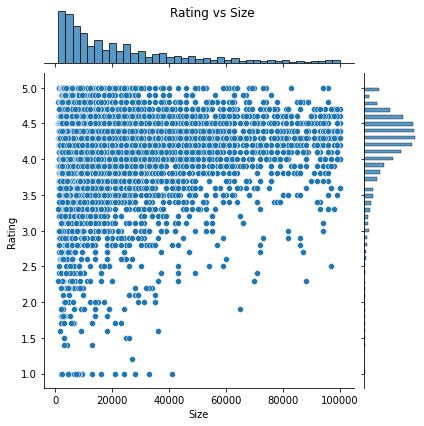

In [45]:
plot = sns.jointplot(x = data.Size, y = data.Rating, kind = 'scatter');
plot.fig.suptitle("Rating vs Size");

### No, heavier apps are not consistently rated better. The scatter plot shows no clear relationship between app size and ratings, with high and low ratings distributed across various app sizes.

#### 7.3	Make scatter plot/joinplot for Rating vs Reviews
    a.	Does more review mean a better rating always?


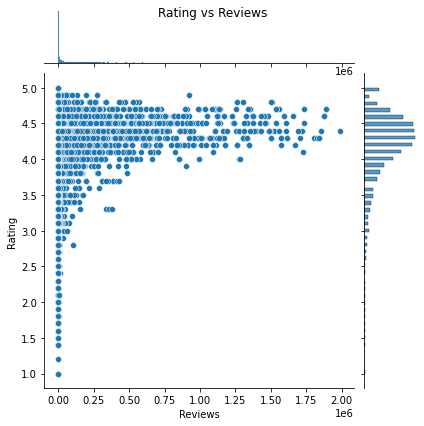

In [46]:
plot = sns.jointplot(x = data.Reviews, y = data.Rating, kind = 'scatter');
plot.fig.suptitle("Rating vs Reviews");

### No, more reviews do not always mean a better rating. The scatter plot indicates that there is no consistent trend showing that a higher number of reviews correlates directly with higher ratings. Ratings vary regardless of the number of reviews.

#### 7.4	Make boxplot for Rating vs Content Rating
    a.	Is there any difference in the ratings? Are some types liked better?

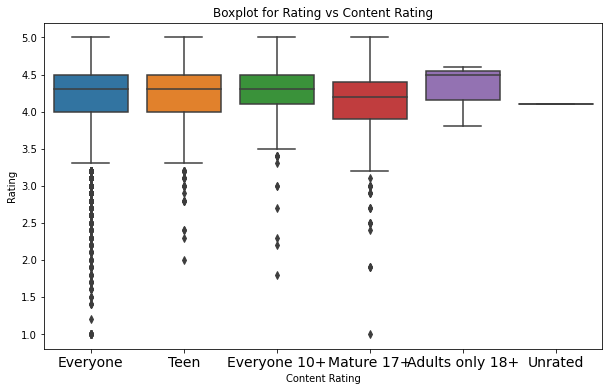

In [47]:
plt.figure(figsize=(10, 6))
sns.boxplot(y=data.Rating, x=data["Content Rating"]).set(title="Boxplot for Rating vs Content Rating")
plt.xticks(fontsize=14)
plt.show()

#### There are some differences in the ratings across content rating categories, but they are not extremely pronounced. The median ratings are fairly similar, though some categories, like Everyone and Teen, have a broader range of ratings, indicating more variability. Categories such as Adults only 18+ and Unrated seem to be rated slightly better on average, but these categories might have fewer apps, which can affect the overall rating trend.

#### 7.5	Make boxplot for Ratings vs. Category
    a.	Which genre has the best ratings?

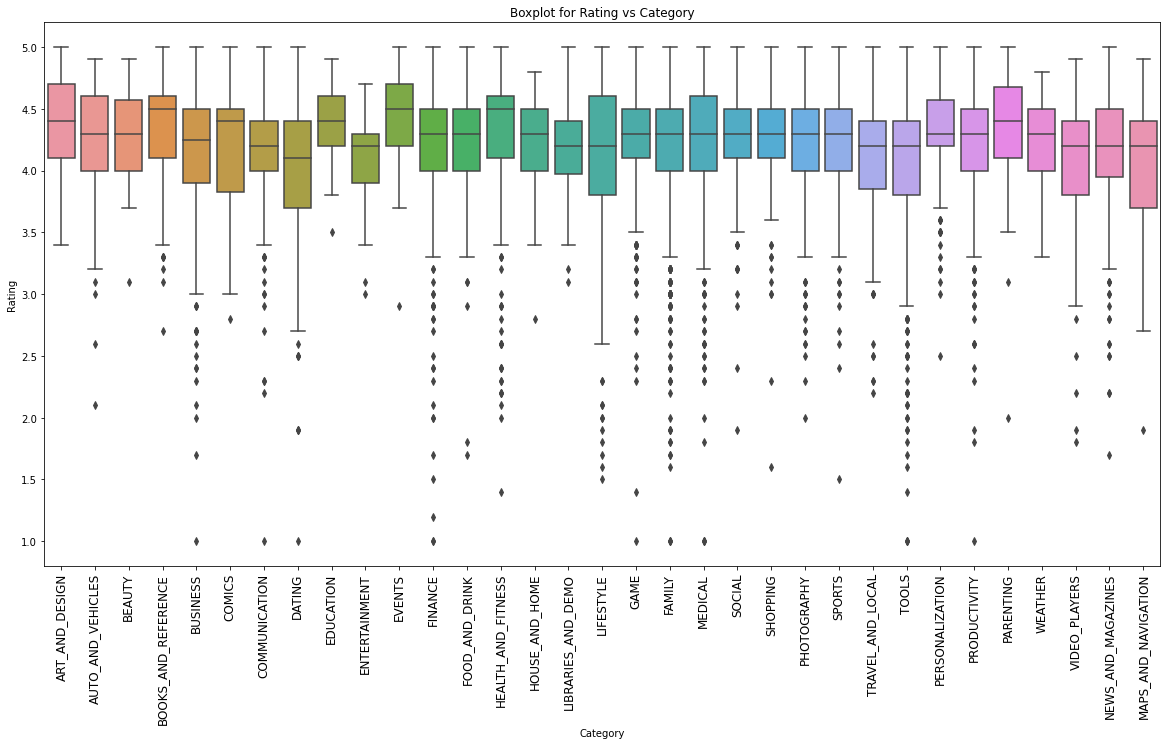

In [48]:
plt.figure(figsize=(20, 10))
sns.boxplot(y=data.Rating, x=data.Category).set(title="Boxplot for Rating vs Category")
plt.xticks(fontsize=12, rotation=90)
plt.show()

### The genre with the best ratings appears to be "EVENTS," as it has a higher median rating and less variability compared to other categories. The ratings in this category seem to be consistently high, with fewer outliers below 4.0 compared to other categories.

## 8 Data preprocessing

For the steps below, create a copy of the dataframe to make all the edits. Name it inp1.

    1. Reviews and Install have some values that are still relatively very high. Before building a linear regression model, you need to reduce the skew. Apply log transformation (np.log1p) to Reviews and Installs.
    2. Drop columns App, Last Updated, Current Ver, and Android Ver. These variables are not useful for our task.
    3. Get dummy columns for Category, Genres, and Content Rating. This needs to be done as the models do not understand categorical data, and all data should be numeric. Dummy encoding is one way to convert character fields to numeric. Name of dataframe should be inp2.


**Making a copy of the dataset**

In [48]:
inp1 = data.copy()

#### 8.1	Reviews and Install have some values that are still relatively very high. Before building a linear regression model, you need to reduce the skew. Apply log transformation (np.log1p) to Reviews and Installs.

In [144]:
# check describe for installs

print(inp1.Installs.describe())

count    8.750000e+03
mean     3.484077e+06
std      8.656515e+06
min      1.000000e+00
25%      1.000000e+04
50%      1.000000e+05
75%      5.000000e+06
max      5.000000e+07
Name: Installs, dtype: float64


In [145]:
inp1.Installs = inp1.Installs.apply(np.log1p)

In [146]:
inp1.Reviews = inp1.Reviews.apply(np.log1p)

#### 8.2	Drop columns App, Last Updated, Current Ver, and Android Ver. These variables are not useful for our task.

In [147]:
inp1.drop(["App", "Last Updated", "Current Ver", "Android Ver"], axis=1, inplace=True)

In [148]:
inp1.shape

(8750, 9)

#### 8.3	Get dummy columns for Category, Genres, and Content Rating. This needs to be done as the models do not understand categorical data, and all data should be numeric. Dummy encoding is one way to convert character fields to numeric. Name of dataframe should be inp2.

Getting dummy variables for Category, Genres, Content Rating

In [149]:
# check types

inp1.dtypes

Category           object
Rating            float64
Reviews           float64
Size              float64
Installs          float64
Type               object
Price             float64
Content Rating     object
Genres             object
dtype: object

In [150]:
inp2 = pd.get_dummies(inp1, drop_first=True)

In [151]:
# display col names

print(inp2.columns)

Index(['Rating', 'Reviews', 'Size', 'Installs', 'Price',
       'Category_AUTO_AND_VEHICLES', 'Category_BEAUTY',
       'Category_BOOKS_AND_REFERENCE', 'Category_BUSINESS', 'Category_COMICS',
       ...
       'Genres_Tools', 'Genres_Tools;Education', 'Genres_Travel & Local',
       'Genres_Travel & Local;Action & Adventure', 'Genres_Trivia',
       'Genres_Video Players & Editors',
       'Genres_Video Players & Editors;Creativity',
       'Genres_Video Players & Editors;Music & Video', 'Genres_Weather',
       'Genres_Word'],
      dtype='object', length=157)


In [152]:
inp2.shape

(8750, 157)

## 9. Train test split  and apply 70-30 split. Name the new dataframes df_train and df_test.

Train - test split

In [153]:
from sklearn.model_selection import train_test_split

In [155]:
df_train, df_test = train_test_split(inp2, train_size = 0.7, random_state = 100)

In [156]:
df_train.shape, df_test.shape

((6125, 157), (2625, 157))

## 10. Separate the dataframes into X_train, y_train, X_test, and y_test.

In [157]:
y_train = df_train.pop("Rating")
X_train = df_train

In [158]:
y_train

9028     4.2
6547     4.4
9069     3.0
3209     4.2
10151    3.0
        ... 
399      4.3
81       4.4
9862     4.5
8511     4.7
6787     3.6
Name: Rating, Length: 6125, dtype: float64

In [159]:
y_test = df_test.pop("Rating")
X_test = df_test

In [160]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(6125, 156)
(6125,)
(2625, 156)
(2625,)


# Build the model

## 11 . Model building

In [161]:
#Build a linear regression model.

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


In [162]:
model = LinearRegression()
model.fit(X_train, y_train)
train_predictions = model.predict(X_train)
print(f'R2 on train set: {r2_score(y_train, train_predictions)}')


R2 on train set: 0.1687854505316947


## 12. Make predictions on test set and report R2.

In [163]:
# Predict on the test set and report R2.

test_predictions = model.predict(X_test)
print(f'R2 on test set: {r2_score(y_test, test_predictions)}')


R2 on test set: 0.13387130861282437
